In [1]:
from fastai.vision.all import *
import torch
torch.cuda.empty_cache()

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1660 Ti with Max-Q Design'

In [3]:
path = Path("spectrogram/")
fnames = get_image_files(path)
print(f"Total Images: {len(fnames)}")
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, num_workers=0, bs=32)

Total Images: 16662


In [ ]:
# from random import shuffle
# from glob import glob
# files = glob("spectrogram/csdeneme/*.png")
# shuffle(files)

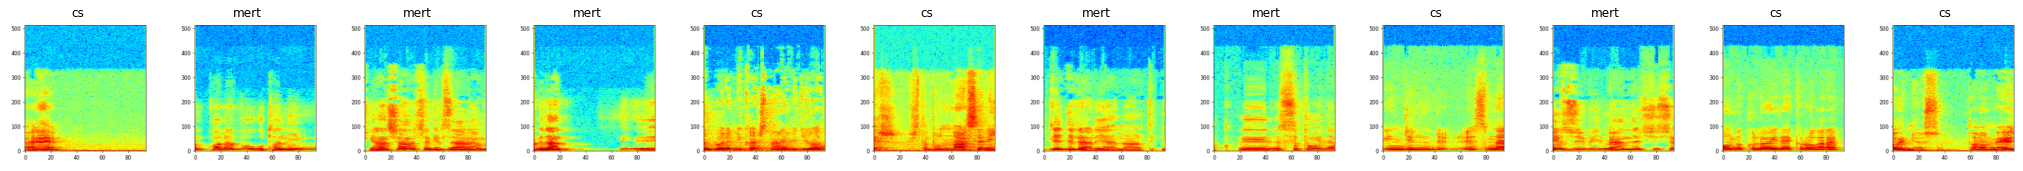

In [4]:
dls.valid.show_batch(max_n=12, nrows=1)
learn = cnn_learner(dls, resnet50, metrics= error_rate)
learn.model = learn.model.cuda()

Minimum/10: 1.45e-02, steepest point: 1.58e-06


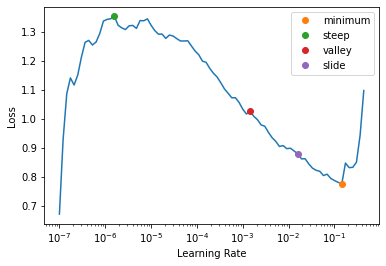

In [5]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print(f"Minimum/10: {lrs.minimum:.2e}, steepest point: {lrs.steep:.2e}")

In [6]:
learn.fine_tune(3, base_lr=1.0e-01)

epoch,train_loss,valid_loss,error_rate,time
0,0.706481,1.699255,0.072629,03:18


epoch,train_loss,valid_loss,error_rate,time
0,0.261419,0.116989,0.009004,04:16
1,0.045775,0.007066,0.002101,04:15
2,0.007716,0.118019,0.002401,04:14


Path('spectrogram/models/my_model.pth')

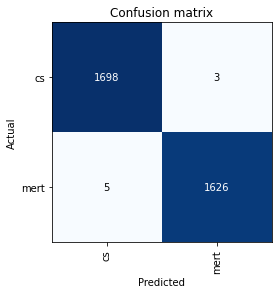

In [7]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()
learn.export()
learn.save("my_model")

In [8]:
liste2 = []
for i in range(0,235):
    liste2.append(learn.predict("spectrogram/person6/spec{}.png".format(i))[0])
textfile = open("github.txt", "w")
for element in liste2:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
# learn = load_learner("export.pkl", cpu=False)